In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Data Loading and Preprocessing

In [2]:
X_train = pd.read_csv('data_train.csv')
X_test = pd.read_csv('data_test.csv')

In [3]:
Y_train = X_train['y']
Y_test = X_test['y']

In [4]:
X_train = X_train.drop('y',axis=1)
X_train = X_train.drop('Unnamed: 0',axis=1)

X_test = X_test.drop('y',axis=1)
X_test = X_test.drop('Unnamed: 0',axis=1)

In [5]:
X_test.head(1)

,duration,pdays,euribor3m,job,marital,education,default,housing,contact,month,day_of_week,poutcome
0,226,999,4.857,1,0,1,0,1,0,0,0,0


# With SMOTE

In [6]:
Counter(Y_train)

Counter({0: 28023, 1: 3540})

In [7]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, Y_train)

In [8]:
Counter(y)

Counter({0: 28023, 1: 28023})

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, 
                              max_depth=10)
      
rf.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [38]:
y_pred = rf.predict(X_test)
print(f1_score(Y_test,y_pred))
print(precision_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

0.5767284991568297
0.44881889763779526
0.8066037735849056
0.8727180527383367


In [12]:
mean(cross_val_score(rf, X, y, cv=10,scoring='f1'))

0.853217173012435

In [ ]:
ggplot(data %>%
count(y),
aes(y,n,fill=y))+
geom_bar(stat="identity")+
labs(title = "Proportion of Customers who have opted for Term Deposits ", x = "If the Customer opted for term deposit",y="Number of Customers")+
theme_minimal()+
scale_x_discrete(labels = c("No","Yes"))+
scale_y_continuous(labels = scales::number_format(big.mark = ','))+
geom_text(aes(y = ((n)/sum(n)), label = scales::percent((n)/sum(n))),vjust = -0.25) +
theme(legend.position = "none")

Random Forest

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

Training = {}
Testing = {}
for n in range(1,20):
  for max_depth in range(1,30):
    for min_sample_split in range(2,1000,100):
      rf = RandomForestClassifier(n_estimators=20, 
                              max_depth=10,
                              max_features='auto', 
                              min_samples_leaf=4,
                              min_samples_split = min_sample_split,
                              bootstrap=True, 
                              n_jobs=-1, 
                              random_state=0)
      
      rf.fit(X, y)
      
      s = "Trees: "+str(n)+" "+"Depth: "+str(max_depth)+" "+"Min_Sample_Split: "+str(min_sample_split)
      scores = cross_val_score(rf, X, y, cv=10,scoring='f1')
      Training[s]=   mean(scores)
      
      y_pred = rf.predict(X_test)
      Testing[s]= f1_score(Y_test, y_pred)




In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=1, oob_score = True,min_samples_split=102) 

param_grid = { 
    'n_estimators': [1, 2,5,10,25,50,100,200],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,5,15,30,50,70,85,100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring="f1")
CV_rfc.fit(X, y)

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB score

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassi

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomFores

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\Users\chnan\Anaconda3\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but Rand

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_split=102,
                                              n_estimators=1, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 15, 30, 50, 70, 85, 100,
                                               200],
                         'n_estimators': [1, 2, 5, 10, 25, 50, 100, 200]},
             scoring='f1')

In [52]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1, oob_score=True)

In [54]:
rf = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=10,max_depth=10,min_samples_split=102) 
rf.fit(X,y)
y_pred = rf.predict(X_test)
f1_score(Y_test,y_pred)

0.5775933609958506

In [55]:
y_pred = rf.predict(X_test)
print(f1_score(Y_test,y_pred))
print(precision_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

0.5775933609958506
0.44558258642765686
0.8207547169811321
0.8709432048681541


In [56]:
mean(cross_val_score(rf, X, y, cv=10,scoring='f1'))

0.8494835763392918

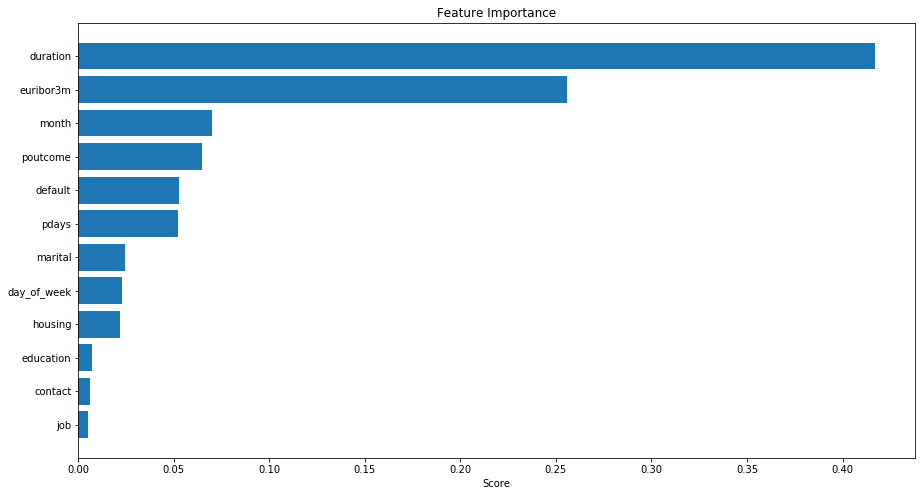

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt

imp = pd.DataFrame({'Importance':rf.feature_importances_, 'Features':X.columns}).sort_values(by='Importance',ascending=True)

plt.figure(figsize=(15,8))
plt.barh(imp['Features'],imp['Importance'])
plt.title('Feature Importance')
plt.xlabel('Score')
plt.show()
plt.savefig("random_forst.png")

In [10]:
Training_List=[]
Training_List_names = []
for i in Training.items():
  Training_List_names.append(i[0])
  Training_List.append(i[1])

d_all_training = {"Model Config":Training_List_names,'Training Average CV F1':Training_List}  

Testing_List=[]
Testing_List_names = []
for i in Testing.items():
  Testing_List_names.append(i[0])
  Testing_List.append(i[1])

d_all_testing= {"Model Config":Testing_List_names,'Testing F1':Testing_List}

In [11]:

df1= pd.DataFrame.from_dict(d_all_training)
df2 = pd.DataFrame.from_dict(d_all_testing)




In [12]:
result = pd.concat([df1, df2], axis=1)

In [16]:
compression_opts = dict(method='zip',
                        archive_name='out.csv') 
df1.to_csv('RF_train.csv', index=False) 
df2.to_csv('RF_test.csv', index=False) 


In [18]:
result.to_csv('RF.csv', index=False) 

In [50]:
temp = pd.concat([X,y], axis=1)

In [54]:
temp.to_csv('SMOTE_data.csv',index=False)